# 1-Introduction

Milestone 1

Nama: Samuel Christian S

Batch : SBY-001

Objective : Penelitian ini di buat untuk memahami karakteristik pelanggan suatu toko, sehingga dapat menciptakan pemasaran yg efektif dan merencanakan strategi yang sesuai. Data di dapatkan dari membership toko.

Link Tableau : https://public.tableau.com/app/profile/samuel.christian4385/viz/Milestone1_16952974753520/Story1?publish=yes

# 2-Identifikasi Masalah

## 2.1-Penjabaran problem statement dengan metode SMART

1. Specific (Spesifik):
meningkatkan pendapatan toko dengan memahami karakteristik pelanggan, preferensi, perilaku berbelanja, dan   berfokus pada merancang pemasaran yang efektif dan strategi yang sesuai.

2. Measurable (Mengukur):
mencapai peningkatan sebesar 30% dengan menerapkan strategi pemasaran yang efektif.

3. Achievable (Dapat Dicapai):
Peningkatan pendapatan dapat dicapai dengan adanya strategi pemasaran yang tepat dan terukur sehingga toko/tim pemasaran dapat memenuhi kebutuhan pelanggan dengan mengetahui karakteristik pelanggannya.

4. Relevant (Relevan):
Memahami karakteristik pelanggan dapat membantu untuk mengarahkan upaya pemasaran menjadi lebih baik, mengidentifikasi peluang bisnis, dan meningkatkan pengalaman pelanggan secara keseluruhan.

5. Time-bound (Terbatas Waktu):
toko/tim pemasaran akan menargetkan peningkatan pendapatan dalam kurun waktu 6 bulan setelah strategi pemasaran diterapkan.

## 2.2-Problem statement

Meningkatkan pendapatan sebesar 30% dengan berfokus pada strategi pemasaran yang sesuai dan efektif yang mengacu pada karakteristik pelanggan untuk mengidentifikasi peluang bisnis dalam kurun waktu 6 bulan

## 2.3- Metric Implementation

Dalam kasus ini dapat dirumuskan penggunaan metric sebagai berikut:

1. Return of Invesment : 
Dipergunakan untuk mengukur kemungkinan seberapa besar keuntungan yang di dapat dari investasi atau modal yang sudah digunakan.

2. Operational Cost :
untuk menghitung biaya-biaya apa saja yang dikeluarkan sebagai biaya rutin dari ivestasi yang dilakukan.


## 2.4-Defining the problem:

1. Apa profesi yang paling banyak menjadi customer?

2. Apa gender yang paling banyak menjadi customer?

3. Range gaji untuk spending score tertinggi

4. Profesi apa yang memiliki rata rata spending score tertinggi

5. Apakah range gaji berpengaruh dengan spending Score?
 
6. Apakah family size berpengaruh terhadap spending score?

7. Distribusi data Annual income (statistik deksriptif) 

8. Apakah spanding score profesi Artist sama dengan profesi Health Care (statistics inferential)

# 3-Data Loading

In [3]:
# import data yang di perlukan
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import time
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

data customer.csv di download dari https://www.kaggle.com/datasets/datascientistanna/customers-dataset

In [12]:
# loading data dari file csv
df = pd.read_csv('customers.csv')
df


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


dari data di atas terlihat bahwa dari 2000 data semuanya berhasil ter load tetapi ada beberapa yang missing.

# 4-Data Cleaning

In [43]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


berikut adalah 5 data teratas dari data customers yang didapatkan melalui data membership toko. dapat dilihat customers cukup bervariasi dari segi usia, pendapatan, dan pekerjaannya. begitu pula dengan spending scorenya.

In [44]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


dari data di atas terlihat adanya missing value pada kolom Proffession. begitu pula pada kolom Annual income dtypenya kurang sesuai yaitu int yang seharusnya float.

## 4.1-Cleaning Missing Values

In [47]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

dari data di atas terlihat ada missing value sebanyak 35 dari 2000 data pada kolom profesi

### 4.1.1-Menghilangkan missing value

untuk mengghilangkan missing value ada 2 cara yaitu dengan mengganti value yang hilang menjadi unknown atau membuang row data yang ada missing valuenya. untuk permasalahan kali ini data yang ada missing valuenya akan di buang.

In [53]:
df.dropna(subset=['Profession'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1965 non-null   int64 
 1   Gender                  1965 non-null   object
 2   Age                     1965 non-null   int64 
 3   Annual Income ($)       1965 non-null   int64 
 4   Spending Score (1-100)  1965 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         1965 non-null   int64 
 7   Family Size             1965 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 138.2+ KB


setelah di lakukan pembuanggan data yang ada missing valuenya pada kolom proddesion dapat dilihat entry data yang semula 2000 data menjadi 1965 data. dan missing value sudah di buang.

### 4.1.2-Data Type Change

In [58]:
df['Annual Income ($)'] = df['Annual Income ($)'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1965 non-null   int64  
 1   Gender                  1965 non-null   object 
 2   Age                     1965 non-null   int64  
 3   Annual Income ($)       1965 non-null   float64
 4   Spending Score (1-100)  1965 non-null   int64  
 5   Profession              1965 non-null   object 
 6   Work Experience         1965 non-null   int64  
 7   Family Size             1965 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 138.2+ KB


dari data di atas terlihat type data pada kolom annual income yang sebelumnya integer sudah di ganti menjadi Float

## 4.3- Save Data

In [59]:
#save data baru yang sudah di olah (setelah di cleaning)
df.to_csv(('customers_baru.csv'), index=False)

# 5-EDA (Exploratory Data Analysis)

In [5]:
# loading data baru yang sudah di olah 
df = pd.read_csv('customers_baru.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000.0,39,Healthcare,1,4
1,2,Male,21,35000.0,81,Engineer,3,3
2,3,Female,20,86000.0,6,Engineer,1,1
3,4,Female,23,59000.0,77,Lawyer,0,2
4,5,Female,31,38000.0,40,Entertainment,2,6


berikut 5 data ter atas dari tabel customers terdapat,customer id , gender, annual income, spending score, proffesion, work experience ,dan family size

## 5.1- Profesi yang paling banyak menjadi customer

In [6]:
df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

Melihat apa saja isi dari kolom profession, terlihat ada 9 profesi dari 1965 data customers

In [7]:
df['Profession'].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

melakukan pengecekan berapa banyak orang dalm suatu profesi. dan dari data di atas terlihat profesi terbanyak adalah artist/seniman, yang ke dua adalah healthcarae dan ke 3 entertainment.

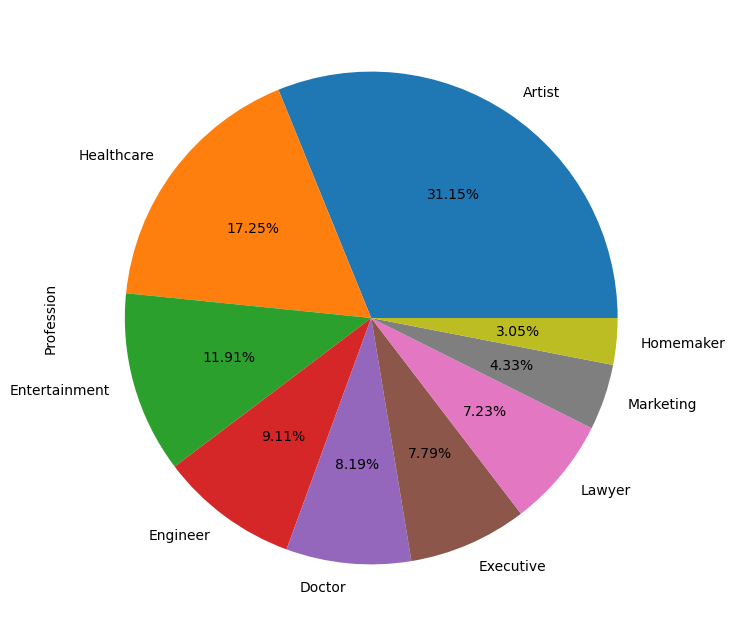

In [8]:
fig,ax1 = plt.subplots(figsize=(8,8))

df['Profession'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

dari data di atas dapat diketahui bahwa profesi dari customer toko yang paling banyak adalah Artist/seniman sebesar 31,15% (612 orang), dan yang paling sedikit adalah Homemaker 3,05% (60 orang)

## 5.2-Gender yang paling banyak menjadi customer

In [9]:
df['Gender'].value_counts()

Female    1166
Male       799
Name: Gender, dtype: int64

dari pengecekan di atas terlihat bahwa dari 1965 data terdapat 1166 perempuan dan 799 laki-laki jadi bisa disimpulkan bahwa customer mostly perempuan.

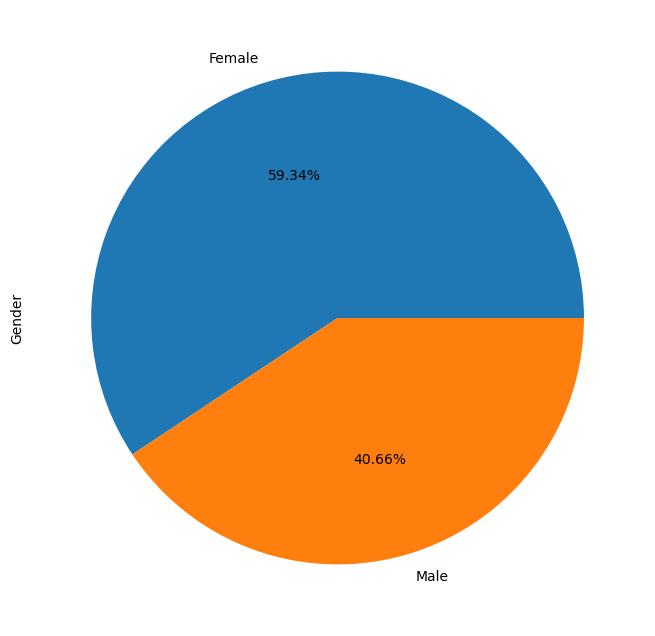

In [10]:
fig,ax1 = plt.subplots(figsize=(8,8))

df['Gender'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

gender yang paling banyak menjadi customer adalah Female/Perempuan 59,34% atau 1166 orang

## 5.3.-Pengaruh range gaji terhadap spending score tertinggi

untuk mengetahui range gaji, annual income perlu di kelompokkan terlebih dahulu

In [13]:
def range_anin (data):
  lst = []
  for i in data:
      if i < 20000 :
        lst.append(1)
      elif i < 40000 :
        lst.append(2)
      elif i < 60000 :
        lst.append(3) 
      elif i < 80000 :
        lst.append(3)
      elif i < 100000 :
        lst.append(4)
      elif i < 120000 :
        lst.append(6)
      elif i < 140000 :
        lst.append(7)
      elif i < 160000 :
        lst.append(8)
      elif i < 180000 :
        lst.append(9)
      elif i < 200000 :
        lst.append(10)
  return lst

setelah mnegelompokkan annual income, langkah selanjutnya adalah membuat kolom baru pada tabel yang berisikan range annual income yang telah di buat

In [14]:
ain = df['Annual Income ($)']
range_pendapatan = range_anin(ain)

In [14]:
df['New Annual Income'] = range_anin(ain)
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,New Annual Income
0,1,Male,19,15000.0,39,Healthcare,1,4,1
1,2,Male,21,35000.0,81,Engineer,3,3,2
2,3,Female,20,86000.0,6,Engineer,1,1,4
3,4,Female,23,59000.0,77,Lawyer,0,2,3
4,5,Female,31,38000.0,40,Entertainment,2,6,2


dari tabel di atas terlihat annual income sudah berhasil di tambahkan kedalam tabel

langkah berikutnya adalah melakukan pengecekan untuk range dari annual income terhadap spending score tertinggi dengan cara sebagai berikut:

In [108]:
income_spending_mean = df.groupby('New Annual Income')['Spending Score (1-100)'].mean().reset_index()

In [146]:
income_spending_mean.sort_values(['Spending Score (1-100)'],ascending=False)

,New Annual Income,Spending Score (1-100)
6,8,54.337121
5,7,52.386667
4,6,51.884000
7,9,51.477679
1,2,50.750000
3,4,50.258389
0,1,49.537037
2,3,49.359307
8,10,48.772727


dari data di atas terlihat range score tertinggi yaitu 54.337121 dari new annual income 8 (range harga < 180000)

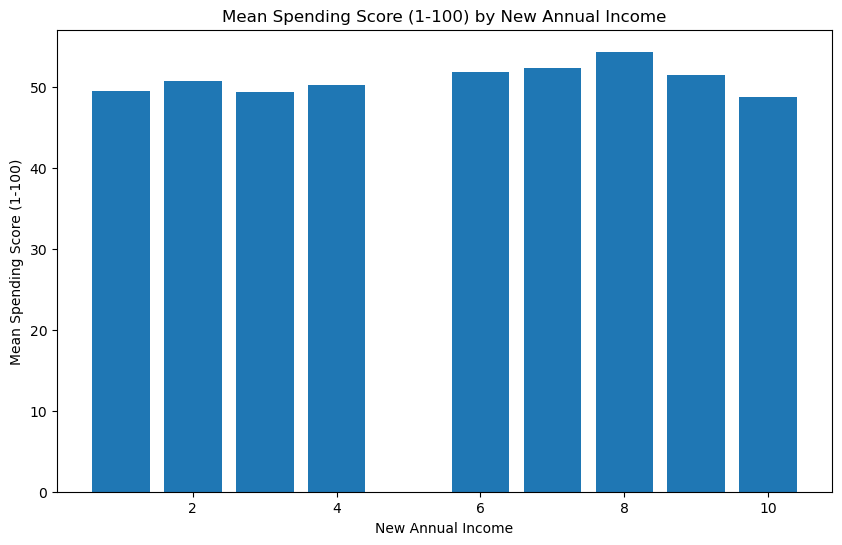

In [147]:
plt.figure(figsize=(10, 6))
plt.bar(income_spending_mean['New Annual Income'], income_spending_mean['Spending Score (1-100)'])
plt.xlabel('New Annual Income')
plt.ylabel('Mean Spending Score (1-100)')
plt.title('Mean Spending Score (1-100) by New Annual Income')
plt.show()

berikut adalah tampilan data mean spending score by annual income dan bisa di lihat data yang tertinggi adalah range harga no 8 yaitu kurang dari 180000

## 5.4-Profesi apa yang memiliki rata rata spending score tertinggi

untuk mengetahui profesi yang memiliki rata-rata spending score tertinggi dilakukan perhitungan sebagai berikut:

In [115]:
profession_spending_mean = df.groupby('Profession')['Spending Score (1-100)'].mean().reset_index()

In [151]:
profession_spending_mean.sort_values(['Spending Score (1-100)'],ascending=False)

,Profession,Spending Score (1-100)
3,Entertainment,52.940171
0,Artist,52.678105
1,Doctor,51.900621
5,Healthcare,50.516224
4,Executive,49.901961
2,Engineer,48.966480
7,Lawyer,48.859155
8,Marketing,48.717647
6,Homemaker,46.383333


dari data di atas terlihat kalau dilihat dari profession yang memiliki rata-rata spending tertinggi adalah entertainment dan yang terendah adalah homemaker

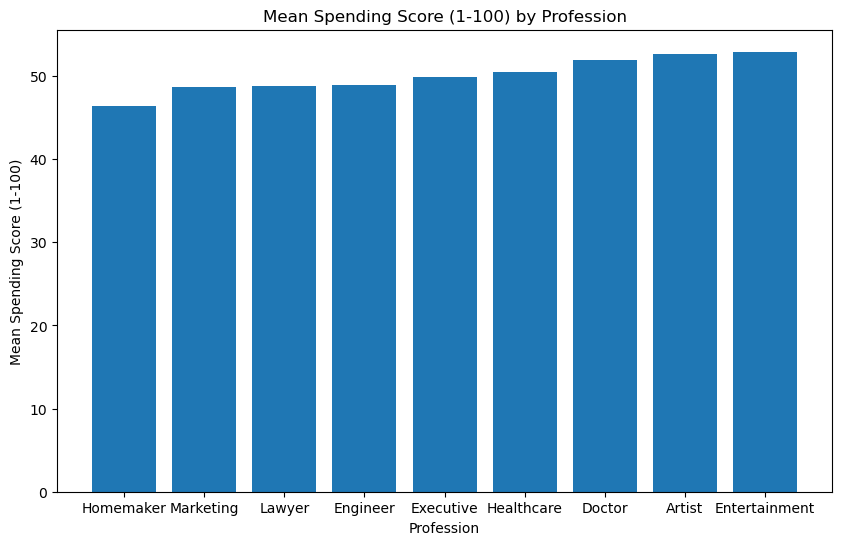

In [145]:
plt.figure(figsize=(10, 6))
plt.bar(profession_spending_mean['Profession'], profession_spending_mean['Spending Score (1-100)'])
plt.xlabel('Profession')
plt.ylabel('Mean Spending Score (1-100)')
plt.title('Mean Spending Score (1-100) by Profession')
plt.show()

berikut adalah data bar yang ditampilkan dari hasil mean spending score by profession dari cart di atas dapat dilihat mean spending score dari profesi dengan 

## 5.5-Pengaruh range gaji terhadap spending score

untuk mengetahui pengaruh range gaji terhadap spending score maka menggunakan metode chi square dengan hipotesis sebagai berikut:

H0: tidak ada pengaruh signifikan Range gaji terhadap Spending Score

H1: terdapat pengaruh yang signifikan antara Range Gaji terhadap spending score

karena menggunakan metode chi suare dimana membandingkan 2 variabel dengan jenis kateggorial maka perlu di lakukan pengelompokan terhadap kolom annual income dan spending score karena annual income sudah di kelompokkan menjadi New Annual Income maka langsung lanjut untuk melakukan pengelompokkan pada Spending Score.

In [85]:
def range_score (data):
  lst = []
  for i in data:
      if i <= 10 :
        lst.append(1)
      elif i <= 20 :
        lst.append(2)
      elif i <= 30 :
        lst.append(3) 
      elif i <= 40 :
        lst.append(3)
      elif i <= 50 :
        lst.append(4)
      elif i <= 60 :
        lst.append(6)
      elif i <= 70 :
        lst.append(7)
      elif i <= 80 :
        lst.append(8)
      elif i <= 90 :
        lst.append(9)
      elif i <= 100 :
        lst.append(10)
  return lst

setelah mengelompokkan new spending score langkah selanjutnya adalah menambahkan kolo baru new spending score ke dalam tabel

In [86]:
sps = df['Spending Score (1-100)']
new_score = range_score(sps)

In [87]:
df['New Spending Score'] = range_score(sps)
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,New Annual Income,New Spending Score
0,1,Male,19,15000.0,39,Healthcare,1,4,1,3
1,2,Male,21,35000.0,81,Engineer,3,3,2,9
2,3,Female,20,86000.0,6,Engineer,1,1,4,1
3,4,Female,23,59000.0,77,Lawyer,0,2,3,8
4,5,Female,31,38000.0,40,Entertainment,2,6,2,3


berikut adalah kolom baru dari range spending score yang telah di tambahkan ke dalam tabel

In [88]:
#Contingency Table
contingency_table = pd.crosstab(df['New Annual Income'],df['New Spending Score'])
contingency_table

New Spending Score,1,2,3,4,6,7,8,9,10
New Annual Income,,,,,,,,,
1,2,10,8,10,6,3,6,4,5
2,6,5,11,6,6,5,6,6,5
3,45,49,87,58,50,45,46,45,37
4,29,30,52,42,37,20,29,31,28
6,20,18,56,30,29,21,25,23,28
7,20,19,40,33,24,24,17,17,31
8,12,26,53,30,32,18,25,38,30
9,18,22,44,28,26,22,18,19,27
10,12,10,30,15,23,12,11,12,7


dari data di atas terlihat kategori baru dari range spending score yang sudah di buat sebelumnya

In [89]:
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.8672525559043979


    (H0): annual income berpengruh terhadap Spending Score customers.

    (H1): annual income tidak berpengaruhberpengruh terhadap Spending Score customers.

dengan nilai 0,86 > 0.05 sehingga dari data di atas dapat disimpulkan bahwa annual income tidak berpengaruh terhadap spending score.

## 5.6-Apakah Family Size berpengaruh terhadap spending score 

pertama tama lakukan pengecekan ada  berapa maksimal dan minimal anggota keluarga dari customers

In [16]:
df["Family Size"].min()

1

dari data di atas terlihat minimal seorang customer memiliki 1 orang dalam keluarga.

In [17]:
df["Family Size"].max()

9

dari data di atas terlihat bahwa seorang customer maksimal memiliki 9 orang dalam keluarganya.

untuk mengetahui pengaruh familysize terhadap spending score maka menggunakan metode chi square dengan hipotesis sebagai berikut:

H0: family size tidak berpengaruh signifikan terhadap spending record customers.

H1: family size berpengaruh signifikan terhadap spending record customers.

karena menggunakan metode chi suare dimana membandingkan 2 variabel dengan jenis kateggorial maka perlu di lakukan pengelompokan terhadap kolom family size

In [15]:
def range_family (data):
  lst = []
  for i in data:
    if i <= 3 :
        lst.append (1)
    elif i <= 6 :
        lst.append (2)
    elif i <= 9 :
        lst.append (3)
  return lst

setelah mengelompokkan family size langkah selanjutnya adalah menambahkan kolom baru new family size ke dalam tabel

In [16]:
fss = df['Family Size']
new_fss = range_family(fss)

In [129]:
df['New Family Size'] = range_family(fss)
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,New Annual Income,New Spending Score,New Family Size
0,1,Male,19,15000.0,39,Healthcare,1,4,1,3,2
1,2,Male,21,35000.0,81,Engineer,3,3,2,9,1
2,3,Female,20,86000.0,6,Engineer,1,1,4,1,1
3,4,Female,23,59000.0,77,Lawyer,0,2,3,8,1
4,5,Female,31,38000.0,40,Entertainment,2,6,2,3,2


dari data di atas terlihat kolm baru new family size telah berhasil di tambahkan

In [130]:
#Contingency Table
contingency_table = pd.crosstab(df['New Family Size'],df['New Spending Score'])
contingency_table

New Spending Score,1,2,3,4,6,7,8,9,10
New Family Size,,,,,,,,,
1,84,100,176,123,114,79,92,99,94
2,64,69,149,102,90,67,76,75,81
3,16,20,56,27,29,24,15,21,23


dari data di atas terlihat ada Range new spending score yang barusan di buat

In [131]:
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.885773024674162


dengan nilai 0,88 > 0.05 sehingga dari data di atas dapat disimpulkan bahwa family size tidak berpengaruh terhadap spending score.

## 5.7-Central Tendency Annual Income (Statistik Deksriptif)

In [154]:
# Perhitungan central tendency (mean, median, modus) spending score
print('Average of Spending Score (1-100):',df['Annual Income ($)'].mean())
print('Median of Spending Score (1-100):',df['Annual Income ($)'].median())
print('Mode of Spending Score (1-100):',df['Annual Income ($)'].mode().values[0])

Average of Spending Score (1-100): 110616.0096692112
Median of Spending Score (1-100): 109759.0
Mode of Spending Score (1-100): 9000.0


Nilai rata-rata (mean) dari data Spending Score yang ada dalam rentang 1 hingga 100. Nilai ini mengindikasikan bahwa rata-rata dari semua nilai Spending Score dalam rentang ini adalah sekitar 110,616.0096692112.
"Median of Spending Score (1-100): 109759.0"

Ini adalah nilai median (nilai tengah) dari data Spending Score dalam rentang 1 hingga 100. Median adalah nilai yang membagi data menjadi dua bagian yang sama besar. Dalam kasus ini, nilai tengahnya adalah 109,759.0, yang berarti setengah dari data memiliki nilai Spending Score di bawah 109,759.0 dan setengah lainnya memiliki nilai di atas 109,759.0.

Ini adalah nilai modus dari data Spending Score dalam rentang 1 hingga 100. Modus adalah nilai yang paling sering muncul dalam data. Dalam hal ini, nilai yang paling sering muncul dalam rentang tersebut adalah 9000.0, yang berarti nilai 9000.0 muncul lebih sering daripada nilai-nilai lainnya dalam data tersebut.


In [124]:
# pengecekan skewness dan kurtosis.
print(f"Skewness: {df['Annual Income ($)'].skew()}")
print(f"Kurtosis: {df['Annual Income ($)'].kurtosis()}")

Skewness: -0.11468074032367216
Kurtosis: -0.8460347592029849


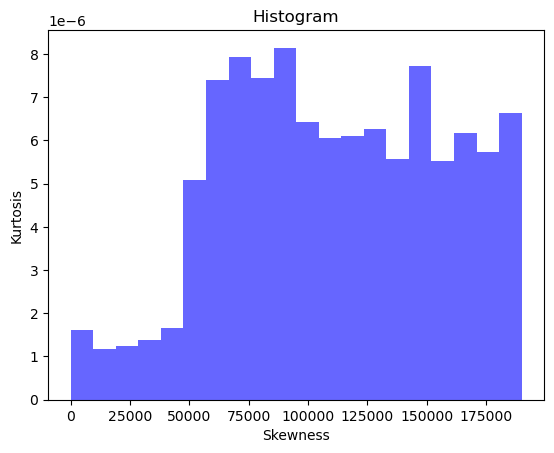

In [126]:
# Create a histogram
plt.hist(df['Annual Income ($)'], bins=20, density=True, alpha=0.6, color='b')

# Add labels and a title
plt.xlabel('Skewness')
plt.ylabel('Kurtosis')
plt.title('Histogram')

# Show the histogram
plt.show()

Skewness Annual Income bernilai -0.11468074032367216, yang mendekati nol. Ini menunjukkan bahwa distribusi pendapatan tahunan cenderung cukup simetris atau memiliki sedikit kemiringan. Ini berarti sebagian besar pelanggan memiliki pendapatan yang berada di sekitar rata-rata atau median pendapatan tahunan.

kurtosis Annual Income bernilai -0.8460347592029849. Ini menunjukkan bahwa distribusi pendapatan tahunan cenderung lebih datar daripada distribusi normal.

Secara keseluruhan, nilai skewness dan kurtosis untuk Annual Income menunjukkan bahwa data cenderung memiliki distribusi yang cukup simetris dan lebih datar daripada distribusi normal. Hal ini bisa menggambarkan variasi yang lebih besar dalam pendapatan tahunan pelanggan dibandingkan dengan distribusi normal yang ideal.

## 5.8-Hypotesis Test (Statistics Inferential)

Apakah spanding score profesi Artist sama dengan profesi Health Care (statistics inferential)

Sebelum melakukan uji hipotesis atas problem di atas, harus dilakukan pengelompkan data menjadi dalam 2 jenis yaitu Artist Score dan Health Care Score.

In [65]:
artist_scores = df[df['Profession'] == 'Artist']['Spending Score (1-100)']
healthcare_scores = df[df['Profession'] == 'Healthcare']['Spending Score (1-100)']

H0 : Tidak ada perbedaan signifikan dalam rata-rata "Spending Score" antara profesi Artist dan Healthcare.

H1 : Terdapat perbedaan signifikan dalam rata-rata "Spending Score" antara profesi Artist dan Healthcare.

In [67]:
t_stat, p_val = stats.ttest_ind(artist_scores, healthcare_scores)
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: 1.1250182043124066
P-value: 0.2608657739864936


Dengan menggunakan tingkat signifikansi alpha sebesar 0.05, maka:

    (H0): Tidak ada perbedaan signifikan dalam rata-rata "Spending Score" antara profesi Artist dan Healthcare.

    (H1): Terdapat perbedaan signifikan dalam rata-rata "Spending Score" antara profesi Artist dan Healthcare.

    sehingga dapat disimpulkan Tidak ada perbedaan signifikan dalam Spending Score antara profesi Artist dan Healthcare.

# 6-Conclusion

Dari penelitian terhadap data dari customer toko dapat diketahui informasi sebagai berikut:

Profesi yang paling banyak menjadi customer adalah Artist/seniman dengan jumlah 612, dan yang paling sedikit adalah homemaker yaitu sekitar 60 orang. dari penelitian ini juga diketahui bawha dari total 1965 pelanggan 59,4% adalah perempuan, jadi customer terbanyak adalah perempuan.

Dalam penelitian diketahui bahwa range gaji dengan spanding score tertinggi adalah rentang annual income antara 160000 sampai 180000 dengan rata-rata spanding score sebesar 54.33. untuk profesi yang memiliki spending score terbesar adalah Enterteinment dengan spending score sebesar 52,46.

Penelitian juga dilakukan untuk untuk meneliti dan mempelajari karakteristik pelanggan. dan dari hasil penelitian ini diketahui bahwa annual income tidak berpengaruh tehadap spanding score customer, begitu pula dengan family size. dalam penelitian ini juga membandingkan mengenai spending score antara 2 profesi yaitu artist sebagai profesi customer yang terbanyak dan health care sebagai profesi terbanyak ke 2. dan dari hasil penelitian diketahui bahwa Tidak ada perbedaan signifikan dalam Spending Score antara profesi Artist dan Healthcare.

tujuan dari penelitian ini untuk meneliti karakteristik customer dengan melihat pola perilaku dengan menganalisa data memeber customer di toko, oleh karena itu dapat disimpulkan bahwa karakteristik customer merupakan hal yang menarik untuk diteliti dan membutuhkan data yang lebih luas lagi untuk melakukan penelitian yang lebih terarah, jai perusahaan bisa menambahkan data survey kepada member agar mendapatkan data yang lebih akurat kedepannya seperti tanggal bergabung, tanggal datang berbelanja, jenis barang yang dibeli. sehingga perilaku customer akan lebih terlihat dengan jelas.

untuk saat ini saran yang bisa disarankan kepada toko adalah dikarenakan rata-rata pengunjung adalah orang yang sudah berkeluarga, maka bisa menyediakan sarana sepreti arena bermain anak, sebagai tempat tunggu anak saat orang tua berbelanja, begitu pula dari data di atas terlihat bawha rentangumur bervariasi bahkan rata2 adalah orang di usia menengah seperti 49, oleh karena itu pelayanan harus lebih di tingkatkan dan bantuan untuk orang-orang lanjut usia misalnya.